In [ ]:
# Necessary imports
import cv2
import numpy as np
#  Importing function cv2_imshow necessary for programming in Google Colab
from google.colab.patches import cv2_imshow

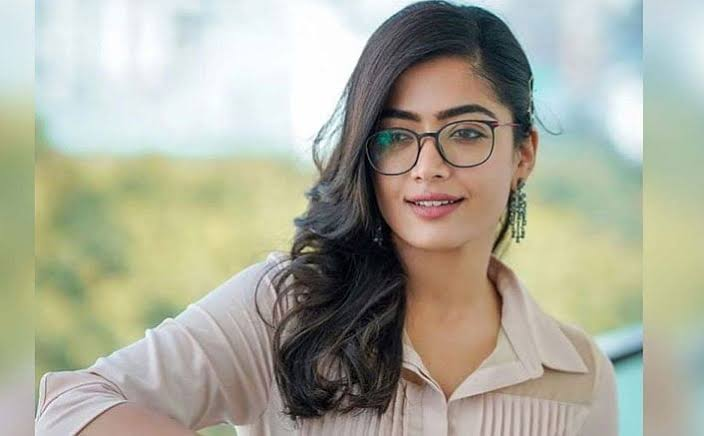

In [ ]:
img = cv2.imread("/content/images (38).jpeg")
cv2_imshow(img)

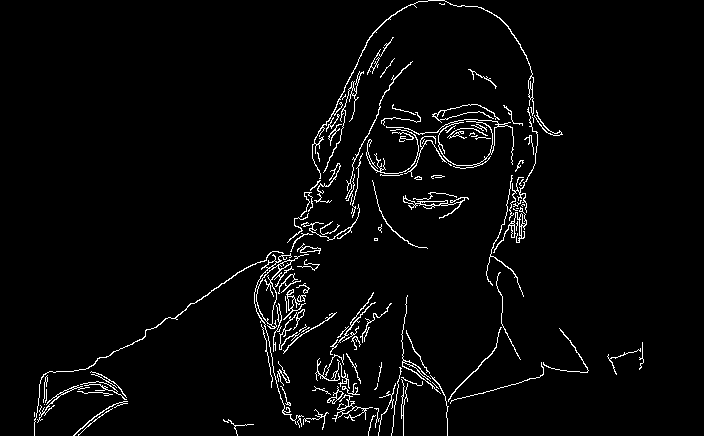

In [ ]:
edges = cv2.Canny(img, 100, 320)
cv2_imshow(edges)

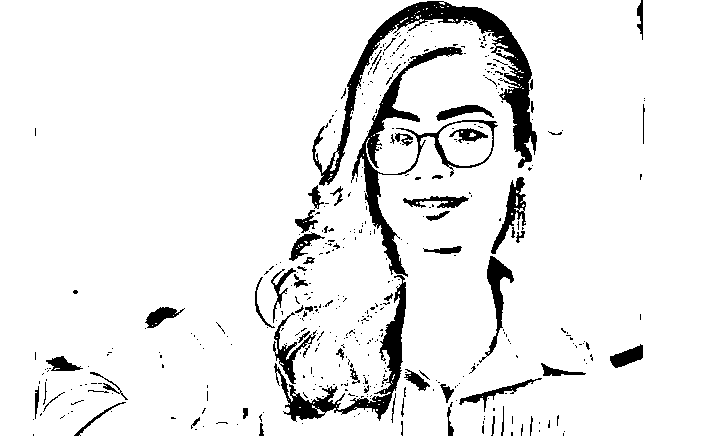

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.adaptiveThreshold(gray, 500, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 47, 27)
cv2_imshow(edges)

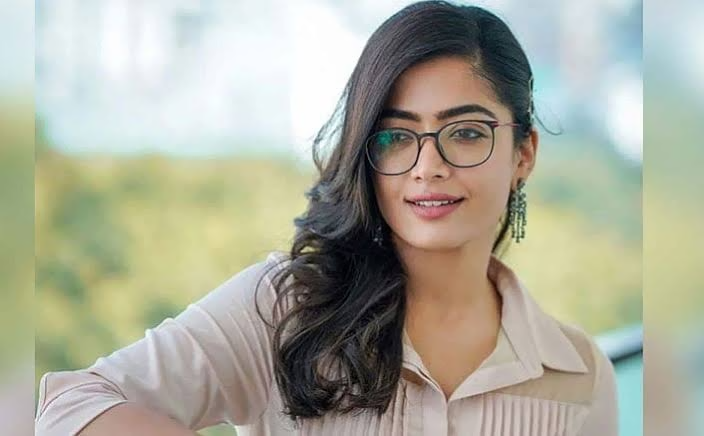

In [ ]:
color = cv2.bilateralFilter(img, d=7, sigmaColor=6,sigmaSpace=9)
cv2_imshow(color)

In [ ]:
def color_quantization(img, k):
# Defining input data for clustering
  data = np.float32(img).reshape((-1, 3))
# Defining criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
# Applying cv2.kmeans function
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

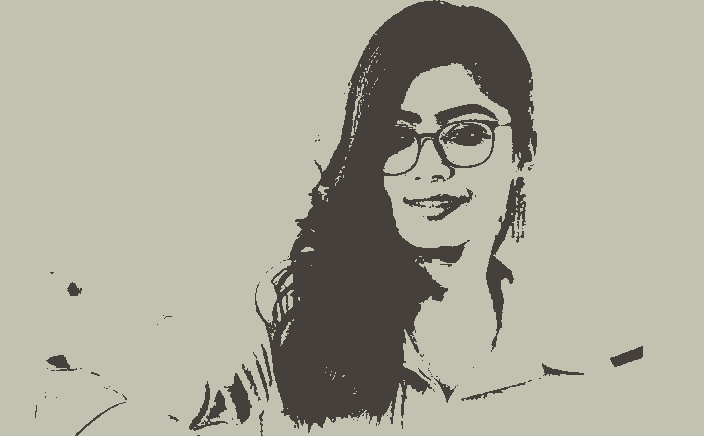

In [ ]:
img_1 = color_quantization(img, 2)
cv2_imshow(img_1)

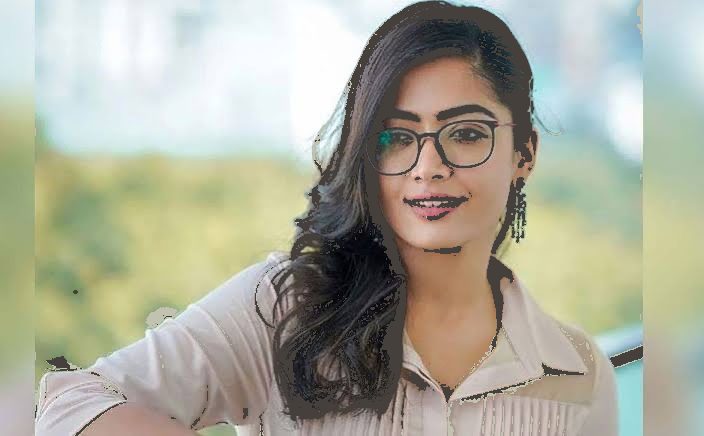

In [ ]:
cartoon = cv2.bitwise_and(color, color, img_1, mask=edges)
cv2_imshow(cartoon)